In [14]:
import numpy as np
import pandas as pd
import pickle as pk
import sys
sys.path.append('..')
from madule import utils
from madule import plots
import arviz as az
import matplotlib.pylab as plt

In [139]:
simNumber = 6
subMainDirec = '/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/simulation/' 
filename = subMainDirec + 'hierParam/'  + str(simNumber) + '/'  +'RLhier3_sim6.pkl'
modelPkl = utils.load_pickle(filename)

In [15]:
# Number of simulation
simNumber = 10
# name of stand plus simuluation number
fileName = 'RL1_sim'
stanName = 'RL1'
subName = 'sub-059'
subMainDirec = '/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/simulation/' 
# The adrees name of pickle file
pickelDir = subMainDirec + subName + '/' + str(simNumber) + '/' + subName +'_' + fileName + '.pkl'
modelPkl = utils.load_pickle(load_path=pickelDir)

In [16]:
fit = modelPkl['fit']

In [17]:
az.summary(fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"alphaAct[0, 0]",0.609,0.116,0.402,0.830,0.009,0.007,152.0,152.0,1.03
"alphaAct[0, 1]",0.147,0.162,0.006,0.453,0.019,0.013,68.0,774.0,1.04
"alphaAct[1, 0]",0.494,0.145,0.265,0.776,0.011,0.008,194.0,72.0,1.02
"alphaAct[1, 1]",0.594,0.142,0.323,0.838,0.010,0.007,207.0,283.0,1.01
"alphaClr[0, 0]",0.521,0.137,0.232,0.754,0.008,0.005,328.0,293.0,1.02
...,...,...,...,...,...,...,...,...,...
soft_max_EV[331],0.763,0.055,0.666,0.868,0.007,0.005,67.0,266.0,1.05
soft_max_EV[332],0.390,0.047,0.305,0.472,0.003,0.002,250.0,295.0,1.01
soft_max_EV[333],0.267,0.046,0.186,0.355,0.005,0.004,92.0,703.0,1.04
soft_max_EV[334],0.539,0.066,0.426,0.660,0.009,0.006,57.0,177.0,1.06


<Axes: title={'center': 'Ses 1 Clr, Hierarchical Weightening'}, xlabel='$w_{(A)}$', ylabel='Density'>

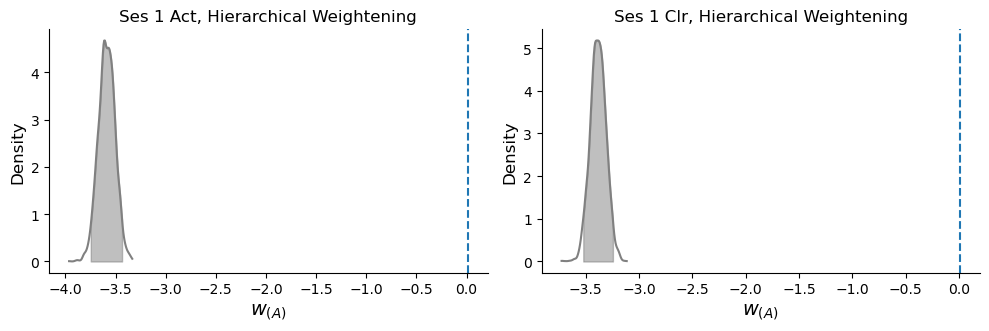

In [19]:
# Extracting posterior distributions for each of four main unkhown parameters
weightAct = fit["transf_weightAct_hier"] 
sensitivity = fit["sensitivity_hier"] 
alphaAct = fit["transf_alphaAct_hier"] 
alphaClr = fit["transf_alphaClr_hier"] 

# Read hierarchical true parameters
hierFile = subMainDirec + 'hierParam/'  + str(simNumber) + '/'  +'hier-Mean-Std-True-Param.csv'
dataHier = pd.read_csv(hierFile)

# Weightening Figure of model fit results in two column and two rows
fig = plt.figure(figsize=(10, 6), tight_layout=True)
rows = 2
columns = 2

fig.add_subplot(rows, columns, 1)
ax = plt.gca()
# Get ground truth
trueValue = dataHier['hierbeta_mu'][0]
plots.plot_posterior(x=sensitivity[0], 
                     ax=ax, 
                     trueValue=trueValue, 
                     title = 'Ses 1 Act, Hierarchical Weightening',
                     ylabel = 'Density',
                     xlabel = '$w_{(A)}$')
fig.add_subplot(rows, columns, 2)
ax = plt.gca()
trueValue = dataHier['hierbeta_mu'][1]
plots.plot_posterior(x=sensitivity[1], 
                     ax=ax, 
                     trueValue=trueValue, 
                     title = 'Ses 1 Clr, Hierarchical Weightening',
                     ylabel = 'Density',
                     xlabel = '$w_{(A)}$')

In [23]:
nChains = 3
nCond = 2 
nSes = 2 
nParts =10 
initials = [] 
for c in range(0, nChains):
    chaininit = {
        'alphaAct_sd': np.random.uniform(.05, .2),
        'alphaClr_sd': np.random.uniform(.05, .2),        
        'weightAct_sd': np.random.uniform(.05, .2),
        'sensitivity_sd': np.random.uniform(.05, .2),
        'alphaAct_hier': np.random.normal(.5, .5, size=(nSes, nCond)),
        'alphaClr_hier': np.random.normal(.5, .5, size=(nSes, nCond)),
        'weightAct_hier': np.random.normal(.5, .5, size=(nSes, nCond)),        
        'sensitivity_hier': np.random.normal(.2, .5, size=(nSes)),
        'alphaAct': np.random.normal(.5, .5, size=(nParts, nSes, nCond)),       
        'alphaClr': np.random.normal(.5, .5, size=(nParts, nSes, nCond)),
        'weightAct': np.random.normal(.5, .5, size=(nParts, nSes, nCond)),   
        'sensitivity': np.random.normal(.2, .5, size=(nParts, nSes)),
        'transf_alphaAct_hier': np.random.uniform(.4, .6, size=(nSes, nCond)),
        'transf_alphaClr_hier': np.random.uniform(.4, .6, size=(nSes, nCond)),
        'transf_weightAct_hier': np.random.uniform(.4, .6, size=(nSes, nCond)),        
        'transf_sensitivity_hier': np.random.uniform(.1, .4, size=(nSes)),
        'transf_alphaAct': np.random.uniform(.4, .6, size=(nParts, nSes, nCond)),       
        'transf_alphaClr': np.random.uniform(.4, .6, size=(nParts, nSes, nCond)),
        'transf_weightAct': np.random.uniform(.4, .6, size=(nParts, nSes, nCond)),   
        'transf_sensitivity': np.random.uniform(.1, .4, size=(nParts, nSes))
    }
    initials.append(chaininit)   


In [24]:
initials

[{'alphaAct_sd': 0.1620467606292626,
  'alphaClr_sd': 0.16926774665146496,
  'weightAct_sd': 0.14961686377148464,
  'sensitivity_sd': 0.08340748364941009,
  'alphaAct_hier': array([[0.37810313, 0.70480187],
         [1.06601283, 0.57026476]]),
  'alphaClr_hier': array([[-0.77707308,  1.12970452],
         [ 0.56450703,  0.47886878]]),
  'weightAct_hier': array([[0.67194968, 0.1748698 ],
         [1.00601876, 0.92646238]]),
  'sensitivity_hier': array([-0.07620804,  0.67304067]),
  'alphaAct': array([[[ 0.51606035,  0.47650978],
          [ 1.01395975, -0.23616347]],
  
         [[ 1.00503872,  0.71602243],
          [ 0.23294005,  0.63459141]],
  
         [[ 0.23485141, -0.11211468],
          [ 0.42636502,  1.29956852]],
  
         [[ 0.55278281,  0.56012207],
          [ 0.25236286, -0.09726667]],
  
         [[ 0.64829159,  0.54101869],
          [ 0.56851693,  0.24590195]],
  
         [[ 0.11172497,  0.70970888],
          [ 0.09709099,  0.12931345]],
  
         [[ 0.48591637, 

In [25]:
3*[.1]

[0.1, 0.1, 0.1]

In [30]:
np.random.normal(10, -1)

ValueError: scale < 0

In [31]:
from scipy import stats

In [71]:
stats.bernoulli.logpmf(0., 1, loc=0)

-inf

In [77]:
np.exp(.02*32)/(np.exp(.02*32)+np.exp(.02*18))

0.569546223939229

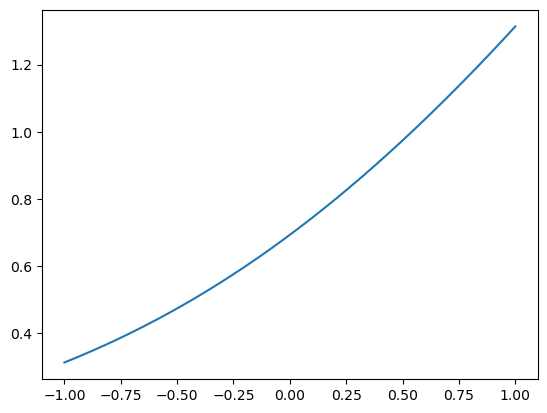

In [132]:
x = np.linspace(-1,1,1000)
plt.plot(x, np.log(1 + np.exp(x)))

In [137]:
np.log(1 + np.exp(-5))

0.006715348489117967

np.exp(-1)

In [119]:
np.exp(-1)

0.36787944117144233